Clasificador

Sistemas inteligentes

Estudiante: Andres Ayala Diaz

Proyecto Final 

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model
from tensorflow.python.client import device_lib
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn.model_selection import train_test_split
import itertools
from sklearn.metrics import confusion_matrix
import pathlib
import os
import pandas as pd
from PIL import Image
import keras

import copy

In [2]:
print(tf.__version__)
print("Numero de GPU disponibles: ", len(tf.config.list_physical_devices("GPU")))
device_lib.list_local_devices()

2.15.0
Numero de GPU disponibles:  0


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 15201300815306018434
 xla_global_id: -1]

In [3]:
dir(keras.applications)

['ConvNeXtBase',
 'ConvNeXtLarge',
 'ConvNeXtSmall',
 'ConvNeXtTiny',
 'ConvNeXtXLarge',
 'DenseNet121',
 'DenseNet169',
 'DenseNet201',
 'EfficientNetB0',
 'EfficientNetB1',
 'EfficientNetB2',
 'EfficientNetB3',
 'EfficientNetB4',
 'EfficientNetB5',
 'EfficientNetB6',
 'EfficientNetB7',
 'EfficientNetV2B0',
 'EfficientNetV2B1',
 'EfficientNetV2B2',
 'EfficientNetV2B3',
 'EfficientNetV2L',
 'EfficientNetV2M',
 'EfficientNetV2S',
 'InceptionResNetV2',
 'InceptionV3',
 'MobileNet',
 'MobileNetV2',
 'MobileNetV3Large',
 'MobileNetV3Small',
 'NASNetLarge',
 'NASNetMobile',
 'RegNetX002',
 'RegNetX004',
 'RegNetX006',
 'RegNetX008',
 'RegNetX016',
 'RegNetX032',
 'RegNetX040',
 'RegNetX064',
 'RegNetX080',
 'RegNetX120',
 'RegNetX160',
 'RegNetX320',
 'RegNetY002',
 'RegNetY004',
 'RegNetY006',
 'RegNetY008',
 'RegNetY016',
 'RegNetY032',
 'RegNetY040',
 'RegNetY064',
 'RegNetY080',
 'RegNetY120',
 'RegNetY160',
 'RegNetY320',
 'ResNet101',
 'ResNet101V2',
 'ResNet152',
 'ResNet152V2',
 'Re

In [4]:
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input

In [5]:
from keras.applications.resnet import ResNet50

from keras.applications.resnet import ResNet101



In [6]:
# Directorio que contiene las imágenes
source_dir = 'DATASET_COMPLETO'

# Tamaño al que se redimensionarán las imágenes
target_size = (250, 250)

# Iterar sobre las imágenes en el directorio fuente
for filename in os.listdir(source_dir):
    filepath = os.path.join(source_dir, filename)
    
    # Comprobar si es un archivo de imagen (por ejemplo, .jpg o .png)
    if filepath.lower().endswith(('.jpg', '.jpeg', '.png')):
        try:
            img = Image.open(filepath)
            
            # Redimensionar manteniendo la relación de aspecto original
            img.thumbnail(target_size, Image.LANCZOS)
            
            # Guardar la imagen redimensionada
            img.save(os.path.join(source_dir, filename))
        except Exception as e:
            print(f"Error al procesar {filename}: {e}")

In [7]:
# Directorio que contiene las subcarpetas de cada clase
base_dir = 'DATASET\TRAIN'

# Obtener la lista de clases (nombres de las subcarpetas)
classes = os.listdir(base_dir)

print(f"Número de clases de TRAIN: {len(classes)}\n")

# Iterar sobre cada clase para contar el número de imágenes
for class_name in classes:
    class_dir = os.path.join(base_dir, class_name)
    class_images = os.listdir(class_dir)
    num_images = len(class_images)
    print(f"Clase: {class_name}, Número de imágenes: {num_images}")

Número de clases de TRAIN: 3

Clase: Capacitores, Número de imágenes: 428
Clase: Resistores, Número de imágenes: 376
Clase: Transformadores, Número de imágenes: 1194


In [8]:
# Directorio que contiene las subcarpetas de cada clase
base_dir = 'DATASET\TEST'

# Obtener la lista de clases (nombres de las subcarpetas)
classes = os.listdir(base_dir)

print(f"Número de clases de TES: {len(classes)}\n")

# Iterar sobre cada clase para contar el número de imágenes
for class_name in classes:
    class_dir = os.path.join(base_dir, class_name)
    class_images = os.listdir(class_dir)
    num_images = len(class_images)
    print(f"Clase: {class_name}, Número de imágenes: {num_images}")

Número de clases de TES: 3

Clase: Capacitores, Número de imágenes: 107
Clase: Resistores, Número de imágenes: 94
Clase: Transformadores, Número de imágenes: 300


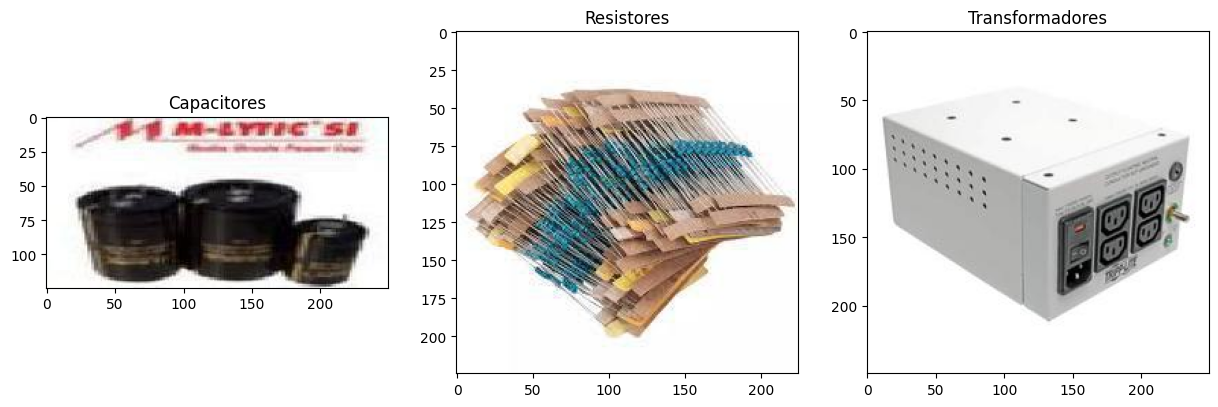

In [9]:
# Directorio donde se encuentran las subcarpetas de cada clase
base_dir = 'DATASET\TRAIN'

# Lista de clases (nombres de las subcarpetas)
#classes = ['Capacitores', 'Resistores', 'Transformadores']

# Configuración del subplot
plt.figure(figsize=(15, 5))

for i, class_name in enumerate(classes):
    class_dir = os.path.join(base_dir, class_name)
    class_images = os.listdir(class_dir)
    
    # Escoger una imagen aleatoria de la clase
    random_image = random.choice(class_images)
    random_image_path = os.path.join(class_dir, random_image)
    
    # Mostrar la imagen
    plt.subplot(1, len(classes), i + 1)
    image = plt.imread(random_image_path)
    plt.imshow(image)
    plt.title(class_name)
    plt.axis('on')

plt.show()

In [10]:
# Define el tamaño de entrada y el número de clases
img_height, img_width = target_size
num_classes = 3  # Reemplaza esto con el número real de clases


# Definición del modelo secuencial
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(target_size[0], target_size[1], 3)),
    MaxPooling2D((2, 2)),
    BatchNormalization(),  # Agregar capa de normalización
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),  # Agregar capa Dropout para regularización
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5), 
    Dense(num_classes, activation='softmax')
])

In [11]:
model2=Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(target_size[0], target_size[1], 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
    ])

In [12]:
source_dir

'DATASET_COMPLETO'

In [13]:
# Directorio que contiene las imágenes
source_dir = 'DATASET_COMPLETO'

# Crear un generador de datos de imágenes
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Flujos de datos para el entrenamiento y la validación
train_generator = datagen.flow_from_directory(
    os.path.join(source_dir),#, 'TRAIN'),
    target_size=target_size,
    batch_size=32,
    class_mode='categorical',  # 'sparse' porque usamos 'SparseCategoricalCrossentropy'
    subset='training')  # Datos de entrenamiento

validation_generator = datagen.flow_from_directory(
    os.path.join(source_dir),#, 'TEST'),
    target_size=target_size,
    batch_size=32,
    class_mode='categorical',
    subset='validation')  # Datos de validación

Found 802 images belonging to 3 classes.
Found 200 images belonging to 3 classes.


In [14]:
alpha_programador = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

In [15]:
# Compilar el modelo
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])



# Entrenamiento del modelo
historia_model=model.fit(train_generator,
          epochs=20,
          validation_data=validation_generator,
          callbacks=[alpha_programador])

Epoch 1/20


26/26 [==============================] - 52s 2s/step - loss: 6.7107 - accuracy: 0.7244 - val_loss: 1.0809 - val_accuracy: 0.5050 - lr: 0.0010
Epoch 2/20
26/26 [==============================] - 49s 2s/step - loss: 0.4159 - accuracy: 0.8242 - val_loss: 1.0424 - val_accuracy: 0.5800 - lr: 0.0011
Epoch 3/20
26/26 [==============================] - 50s 2s/step - loss: 0.3348 - accuracy: 0.8666 - val_loss: 1.0060 - val_accuracy: 0.6050 - lr: 0.0013
Epoch 4/20
26/26 [==============================] - 50s 2s/step - loss: 0.2572 - accuracy: 0.9027 - val_loss: 0.9101 - val_accuracy: 0.6950 - lr: 0.0014
Epoch 5/20
26/26 [==============================] - 50s 2s/step - loss: 0.2208 - accuracy: 0.9190 - val_loss: 0.8348 - val_accuracy: 0.7050 - lr: 0.0016
Epoch 6/20
26/26 [==============================] - 50s 2s/step - loss: 0.2123 - accuracy: 0.9202 - val_loss: 0.7679 - val_accuracy: 0.9150 - lr: 0.0018
Epoch 7/20
26/26 [==============================] - 50s 2s/step - loss: 0.1660 -

In [16]:
model.save('ModeloInteligentes.h5')

c:\Users\user\miniconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Text(0.5, 1.0, 'Encontrando la tasa de aprendizaje óptima')

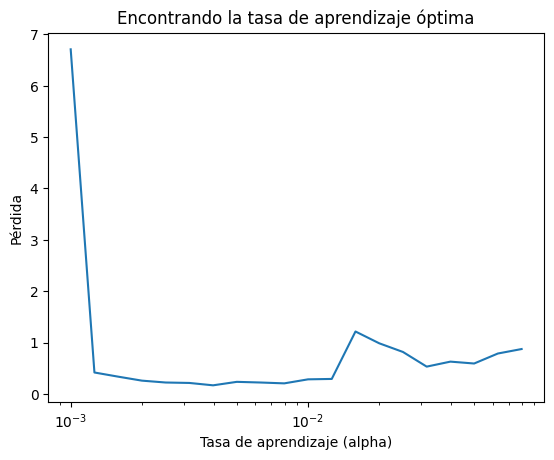

In [18]:
alphas = 1e-3 * (10**(np.arange(20)/10))

plt.semilogx(alphas, historia_model.history['loss'])
plt.xlabel("Tasa de aprendizaje (alpha)")
plt.ylabel("Pérdida")
plt.title("Encontrando la tasa de aprendizaje óptima")

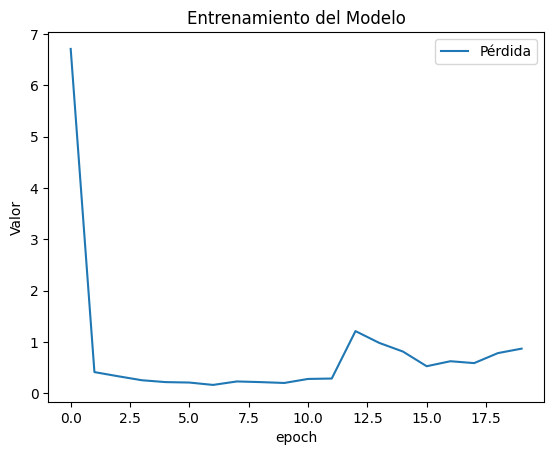

In [23]:
loss = historia_model.history['loss']

# Crear el gráfico de líneas
plt.plot(loss, label='Pérdida')  # Plot de la pérdida

plt.title('Entrenamiento del Modelo')
plt.xlabel('epoch')
plt.ylabel('Valor')
plt.legend()  # Mostrar leyenda si se agregaron múltiples métricas

plt.show()

<Axes: title={'center': 'Modelo Inteligentes'}>

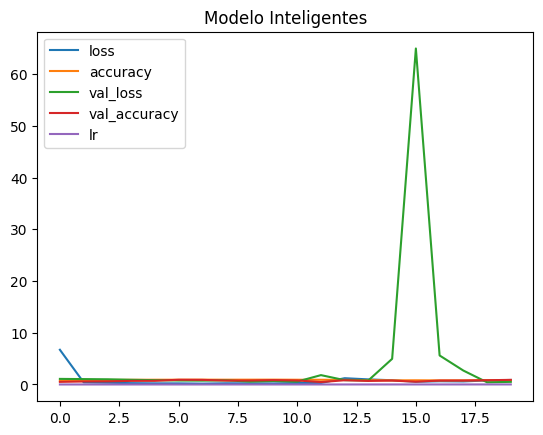

In [26]:
pd.DataFrame(historia_model.history).plot(title='Modelo Inteligentes')

In [28]:
def crear_matriz_confusion(y_verdadero, y_pred, clases=None, figsize=(5,5), text_size=15):
  mc = confusion_matrix(y_verdadero, y_pred)
  mc_normalizado = mc.astype("float")/mc.sum(axis=1)[:, np.newaxis]
  n_clases = mc.shape[0]

  fig, eje = plt.subplots(figsize=figsize)

  eje_color = eje.matshow(mc, cmap=plt.cm.Blues)
  fig.colorbar(eje_color)

  if clases:
    etiquetas = clases
  else:
    etiquetas = np.arange(n_clases)

  eje.set(
      title="Matriz de confusion",
      xlabel="Etiqueta predicción",
      ylabel="Etiqueta verdadera",
      xticks=np.arange(len(clases)),
      yticks=np.arange(len(clases)),
      xticklabels=etiquetas,
      yticklabels=etiquetas
  )

  eje.xaxis.set_label_position("bottom")
  eje.xaxis.tick_bottom()

  umbral = (mc.min() + mc.max()) / 2

  for i, j in itertools.product(range(mc.shape[0]), range(mc.shape[1])):
    plt.text(j, i, f"{mc[i, j]} {mc_normalizado[i, j]*100:.1f}%",
             horizontalalignment="center",
             color="white" if mc[i, j] > umbral else "black",
             size=text_size
             )

In [29]:
validation_generator

In [30]:
# Obtener las etiquetas verdaderas del generador de datos de prueba
y_verdadero = validation_generator.classes

In [31]:
# Obtener las predicciones del modelo en el conjunto de datos de prueba
y_pred_prob = model.predict(validation_generator)
y_pred = np.argmax(y_pred_prob, axis=1)  # Convertir las probabilidades en etiquetas predichas

7/7 [==============================] - 2s 298ms/step


In [32]:
y_verdadero

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [33]:
y_pred

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0], dtype=int64)

In [34]:
classes=['Cap', 'Res', 'Transf']

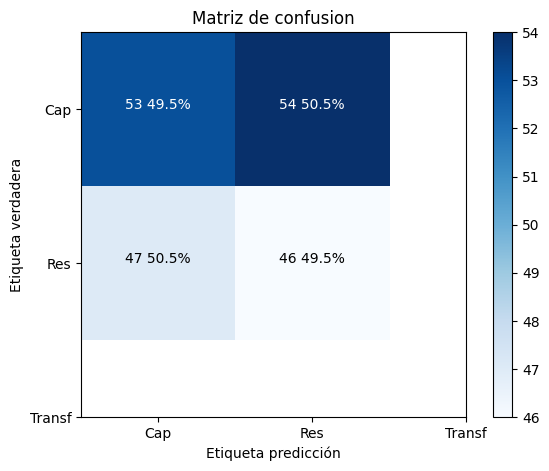

In [35]:
crear_matriz_confusion(y_verdadero=y_verdadero,
                       y_pred=y_pred,
                       clases=classes,
                       figsize=(7,5),
                       text_size=10)

In [36]:
# Compilar el modelo
model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0016),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

# Entrenamiento del modelo
historia_model=model2.fit(train_generator,
          epochs=6,
          validation_data=validation_generator)

Epoch 1/6
26/26 [==============================] - 16s 572ms/step - loss: 1.6893 - accuracy: 0.6259 - val_loss: 0.8231 - val_accuracy: 0.7250
Epoch 2/6
26/26 [==============================] - 14s 550ms/step - loss: 0.4240 - accuracy: 0.8279 - val_loss: 1.0451 - val_accuracy: 0.8950
Epoch 3/6
26/26 [==============================] - 16s 629ms/step - loss: 0.3186 - accuracy: 0.8828 - val_loss: 1.1651 - val_accuracy: 0.8750
Epoch 4/6
26/26 [==============================] - 17s 631ms/step - loss: 0.3023 - accuracy: 0.8753 - val_loss: 1.7299 - val_accuracy: 0.9000
Epoch 5/6
26/26 [==============================] - 16s 609ms/step - loss: 0.2216 - accuracy: 0.9177 - val_loss: 1.7534 - val_accuracy: 0.8900
Epoch 6/6
26/26 [==============================] - 17s 648ms/step - loss: 0.3168 - accuracy: 0.8815 - val_loss: 2.6062 - val_accuracy: 0.8100


<Axes: title={'center': 'Modelo Inteligentes 2'}>

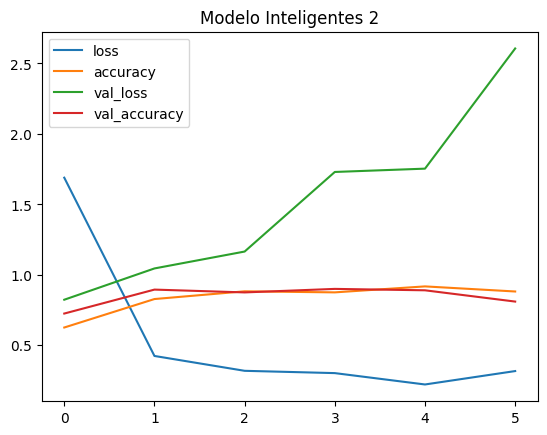

In [37]:
pd.DataFrame(historia_model.history).plot(title='Modelo Inteligentes 2')

In [38]:
# Obtener las predicciones del modelo en el conjunto de datos de prueba
y_pred_prob = model2.predict(validation_generator)
y_pred = np.argmax(y_pred_prob, axis=1)  # Convertir las probabilidades en etiquetas predichas

7/7 [==============================] - 1s 100ms/step


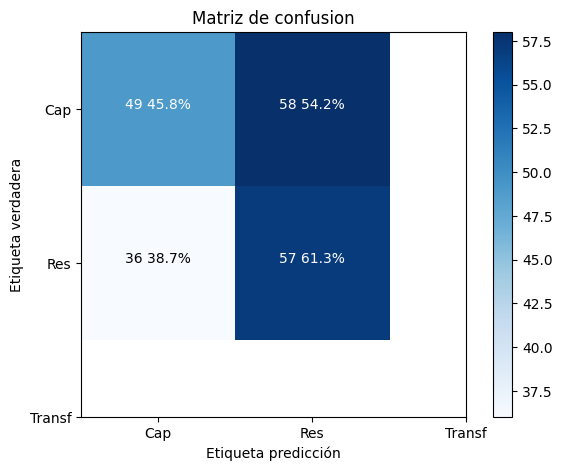

In [39]:
crear_matriz_confusion(y_verdadero=y_verdadero,
                       y_pred=y_pred,
                       clases=classes,
                       figsize=(7,5),
                       text_size=10)

In [40]:
model2.save('ModeloInteligentes2.h5')

c:\Users\user\miniconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [41]:
model3 = InceptionV3(input_shape=[250, 250]+[3], weights='imagenet', include_top=False)

87910968/87910968 [==============================] - 16s 0us/step


In [42]:
model3.input

<KerasTensor: shape=(None, 250, 250, 3) dtype=float32 (created by layer 'input_1')>

In [43]:
model3.trainable = False

In [44]:
prediction = Dense(3, activation='softmax')(Flatten()(model2.output))
model3 = keras.models.Model(inputs=model2.input, outputs=prediction)
model3.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3_input (InputLayer  [(None, 250, 250, 3)]     0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 248, 248, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 124, 124, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 122, 122, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 61, 61, 64)        0         
 g2D)                                                            
                                                             

Total params: 13872719 (52.92 MB)
Trainable params: 13872719 (52.92 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [45]:
model3.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.SGD(), metrics=['accuracy'])

In [46]:
train_generator

In [47]:
validation_generator

In [48]:
historia3 = model3.fit( train_generator,epochs=20,validation_data=validation_generator,callbacks=[alpha_programador])

Epoch 1/20
26/26 [==============================] - 15s 541ms/step - loss: 1.1037 - accuracy: 0.4726 - val_loss: 1.0675 - val_accuracy: 0.6050 - lr: 0.0010
Epoch 2/20
26/26 [==============================] - 14s 545ms/step - loss: 1.0497 - accuracy: 0.6384 - val_loss: 1.0365 - val_accuracy: 0.7050 - lr: 0.0011
Epoch 3/20
26/26 [==============================] - 14s 541ms/step - loss: 1.0228 - accuracy: 0.7007 - val_loss: 1.0146 - val_accuracy: 0.7400 - lr: 0.0013
Epoch 4/20
26/26 [==============================] - 14s 535ms/step - loss: 1.0059 - accuracy: 0.7307 - val_loss: 0.9953 - val_accuracy: 0.7800 - lr: 0.0014
Epoch 5/20
26/26 [==============================] - 14s 550ms/step - loss: 0.9911 - accuracy: 0.7456 - val_loss: 0.9795 - val_accuracy: 0.8000 - lr: 0.0016
Epoch 6/20
26/26 [==============================] - 15s 556ms/step - loss: 0.9752 - accuracy: 0.7743 - val_loss: 0.9633 - val_accuracy: 0.8250 - lr: 0.0018
Epoch 7/20
26/26 [==============================] - 14s 538ms/st

<Axes: title={'center': 'Modelo Inteligentes 3'}>

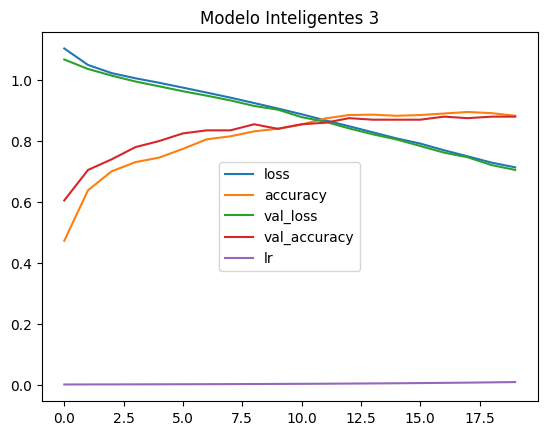

In [49]:
pd.DataFrame(historia3.history).plot(title='Modelo Inteligentes 3')

7/7 [==============================] - 1s 104ms/step


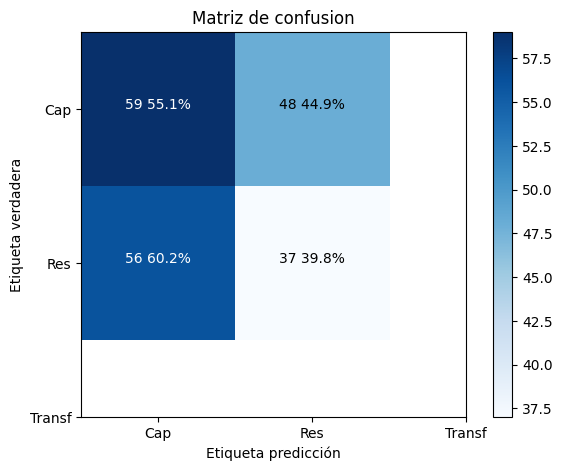

In [50]:
# Obtener las predicciones del modelo en el conjunto de datos de prueba
y_pred_prob = model3.predict(validation_generator)
y_pred = np.argmax(y_pred_prob, axis=1)  # Convertir las probabilidades en etiquetas predichas
crear_matriz_confusion(y_verdadero=y_verdadero,
                       y_pred=y_pred,
                       clases=classes,
                       figsize=(7,5),
                       text_size=10)

7/7 [==============================] - 1s 106ms/step


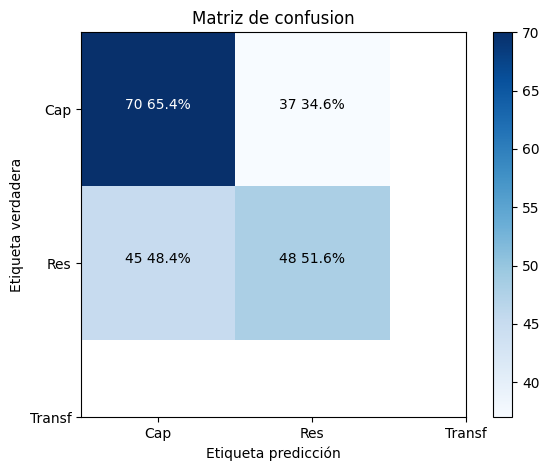

In [51]:
# Obtener las predicciones del modelo en el conjunto de datos de prueba
y_pred_prob = model3.predict(validation_generator)
y_pred = np.argmax(y_pred_prob, axis=1)  # Convertir las probabilidades en etiquetas predichas
crear_matriz_confusion(y_verdadero=y_verdadero,
                       y_pred=y_pred,
                       clases=classes,
                       figsize=(7,5),
                       text_size=10)

In [1]:
from keras.applications.mobilenet_v2 import MobileNetV2

In [ ]:
model5=MobileNetV2(weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(250, 250, 3),
    include_top=False)  # Do not include the ImageNet classifier at the top.
model5.trainable=False #freeze model

9406464/9406464 [==============================] - 1s 0us/step


In [ ]:
inputs = keras.Input(shape=(250, 250, 3))
# We make sure that the base_model is running in inference mode here,
# by passing `training=False`. This is important for fine-tuning, as you will
# learn in a few paragraphs.
x = model5(inputs, training=False)
# Convert features of shape `base_model.output_shape[1:]` to vectors
x = keras.layers.GlobalAveragePooling2D()(x)
# A Dense classifier 3 classes
outputs = keras.layers.Dense(3)(x)
model5 = keras.Model(inputs, outputs)

In [ ]:
#fit model new data
model5.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

In [ ]:
# Crear un generador de datos de imágenes
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2, preprocessing_function=keras.applications.resnet.preprocess_input)

# Flujos de datos para el entrenamiento y la validación
train_generator_preprocessed = datagen.flow_from_directory(
    os.path.join(source_dir),#, 'TRAIN'),
    target_size=target_size,
    batch_size=32,
    class_mode='categorical',  # 'sparse' porque usamos 'SparseCategoricalCrossentropy'
    subset='training')  # Datos de entrenamiento

validation_generator_preprocessed = datagen.flow_from_directory(
    os.path.join(source_dir),#, 'TEST'),
    target_size=target_size,
    batch_size=32,
    class_mode='categorical',
    subset='validation')  # Datos de validación

Found 1402 images belonging to 3 classes.
Found 350 images belonging to 3 classes.


In [ ]:
historia5 = model5.fit(train_generator_preprocessed,
                        epochs=20,
                       validation_data=validation_generator_preprocessed,
                       callbacks=[alpha_programador])

Epoch 1/20
44/44 [==============================] - ETA: 0s - loss: 7.3879 - accuracy: 0.3188

c:\Users\Bruno\anaconda3\envs\bruno_vision_1\lib\site-packages\PIL\Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


44/44 [==============================] - 29s 545ms/step - loss: 7.3879 - accuracy: 0.3188 - val_loss: 8.4590 - val_accuracy: 0.4257 - lr: 0.0010
Epoch 2/20
44/44 [==============================] - 22s 506ms/step - loss: 7.1706 - accuracy: 0.4265 - val_loss: 7.2773 - val_accuracy: 0.4257 - lr: 0.0011
Epoch 3/20
44/44 [==============================] - 22s 510ms/step - loss: 7.6577 - accuracy: 0.4265 - val_loss: 7.5525 - val_accuracy: 0.4257 - lr: 0.0013
Epoch 4/20
44/44 [==============================] - 22s 497ms/step - loss: 7.9098 - accuracy: 0.4265 - val_loss: 7.8288 - val_accuracy: 0.4257 - lr: 0.0014
Epoch 5/20
44/44 [==============================] - 22s 500ms/step - loss: 8.0592 - accuracy: 0.4265 - val_loss: 7.9209 - val_accuracy: 0.4257 - lr: 0.0016
Epoch 6/20
44/44 [==============================] - 22s 502ms/step - loss: 8.1971 - accuracy: 0.4265 - val_loss: 7.9669 - val_accuracy: 0.4257 - lr: 0.0018
Epoch 7/20
44/44 [==============================] - 22s 508ms/step - loss: 

CONCLUSIONES:

El código se divide en varias secciones:

Preprocesamiento de datos: Se redimensionan las imágenes en el directorio de origen para ajustarlas al tamaño deseado. Luego se realiza un recuento de las imágenes disponibles para el conjunto de entrenamiento y de pruebas.

Visualización de datos: Se muestra una selección aleatoria de imágenes de cada clase para comprender cómo se ven.

Construcción del modelo: Se define un modelo de red neuronal convolucional (CNN) utilizando capas convolucionales, de agrupación, normalización y de tipo densas. Este modelo se compila y se define el flujo de datos para entrenamiento y validación usando un generador de imágenes.

Entrenamiento del modelo: Se entrena el modelo utilizando el conjunto de datos de entrenamiento y se visualiza la pérdida a lo largo del entrenamiento para encontrar la tasa de aprendizaje óptima.

Evaluación del modelo: Se muestra la pérdida y la precisión del modelo a lo largo de las épocas. Además, se crea una matriz de confusión para evaluar el desempeño del modelo en la clasificación de las clases.

En cuanto a los resultados, se ha construido un modelo de clasificación de imágenes utilizando una CNN. El código realiza el preprocesamiento de los datos, la construcción y entrenamiento del modelo, y la evaluación de su desempeño. Los gráficos generados permiten comprender el rendimiento del modelo, identificar la pérdida y la precisión a lo largo del entrenamiento, así como visualizar la matriz de confusión para evaluar cómo el modelo clasifica cada clase.

En resumen, el código establece un flujo completo para el procesamiento de imágenes, la construcción de un modelo de aprendizaje profundo y la evaluación de su desempeño en la clasificación de clases específicas, brindando información valiosa sobre el modelo para el conjunto de datos dado.